<a href="https://colab.research.google.com/github/primasr/SubmissionDicoding_MLuntukPemula/blob/main/Submission_MLuntukPemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri


In [ ]:
Nama Lengkap        : Prima Secondary Ramadhan
Username            : primasr
Email               : primasecondary121201@gmail.com
Profile Image       : https://d17ivq9b7rppb3.cloudfront.net/small/avatar/201909261957173daa09c223cb6b1f515b5426cb6a9b0e.PNG
Nomor HP            : +6285232414072
Domisili            : Banyuwangi
Tempat Lahir        : Mojokerto
Tanggal Lahir       : 12-12-2001
Pendidikan Terakhir : SMA
Pekerjaan Saat ini  : Institut Teknologi Sepuluh Nopember

# Kriteria Penilaian

*   Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau 
gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
*   Dataset harus dibagi menjadi train set dan validation set.
*   Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
*   Harus mengimplementasikan augmentasi gambar.
*   Menggunakan image data generator.
*   Model harus menggunakan model sequential.
*   Pelatihan model tidak melebihi waktu 30 menit.
*   Program dikerjakan pada Google Colaboratory.
*   Akurasi dari model minimal 85%.
*   Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah.
https://d17ivq9b7rppb3.cloudfront.net/original/academy/202004302318257ec23b834046174a7d426680e488905e.png
*   Manambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.

# Proyek Akhir : Klasifikasi Gambar

In [ ]:
# cek versi TF
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
## mempersiapkan gambar dengan mendownloadnya
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [ ]:
## melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
## install split-folder
# !pip install split-folders

## split folder/dataset menjadi 60% dan 40%
import splitfolders as sf
input_dir = "/tmp/rockpaperscissors/rps-cv-images"
sf.ratio(input_dir, output="/tmp/rockpaperscissors/rps_split", seed=1337, ratio=(.6,.4))

## membuat folder train dan validation
base_dir = "/tmp/rockpaperscissors/rps_split"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

Copying files: 2188 files [00:00, 3802.42 files/s]


In [ ]:
## menampung direktori dari setiap kelas
train_rock_dir = os.path.join(train_dir, "rock")
train_paper_dir = os.path.join(train_dir, "paper")
train_scissors_dir = os.path.join(train_dir, "scissors")

val_rock_dir = os.path.join(val_dir, "rock")
val_paper_dir = os.path.join(val_dir, "paper")
val_scissors_dir = os.path.join(val_dir, "scissors")

In [ ]:
## membuat sebuah objek ImageDataGenerator
## dibawah merupakan contoh Augmentasi Gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [ ]:
## mempersiapkan data latih yang akan dipelajari oleh model

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150,150), # mengubah resolusi menjadi 150x150 px
    batch_size=32,
    class_mode='categorical' # karena klasifikasi 3 kelas
)

validation_generator = test_datagen.flow_from_directory(
    val_dir, # direktori data validation
    target_size=(150,150), # mengubah resolusi menjadi 150x150 px
    batch_size=32,
    class_mode='categorical' # karena klasifikasi 3 kelas
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
## membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
## memanggil fungsi compile
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# latih model menggunakan fit
history = model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan epochs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/20
25/25 - 42s - loss: 1.0778 - accuracy: 0.3913 - val_loss: 0.8448 - val_accuracy: 0.7250
Epoch 2/20
25/25 - 41s - loss: 0.6355 - accuracy: 0.7387 - val_loss: 0.4235 - val_accuracy: 0.8813
Epoch 3/20
25/25 - 42s - loss: 0.3270 - accuracy: 0.8875 - val_loss: 0.2612 - val_accuracy: 0.9125
Epoch 4/20
25/25 - 42s - loss: 0.3084 - accuracy: 0.8838 - val_loss: 0.3614 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 41s - loss: 0.2382 - accuracy: 0.9200 - val_loss: 0.1460 - val_accuracy: 0.9563
Epoch 6/20
25/25 - 41s - loss: 0.1959 - accuracy: 0.9300 - val_loss: 0.2465 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 41s - loss: 0.2356 - accuracy: 0.9200 - val_loss: 0.2161 - val_accuracy: 0.8938
Epoch 8/20
25/25 - 41s - loss: 0.1674 - accuracy: 0.9362 - val_loss: 0.1425 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 41s - loss: 0.1417 - accuracy: 0.9513 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 41s - loss: 0.1353 - accuracy: 0.9488 - val_loss: 0.1662 - val_accuracy: 0.9563
Epoch 11/

Saving paper-2.jpg to paper-2 (3).jpg
paper-2.jpg
paper


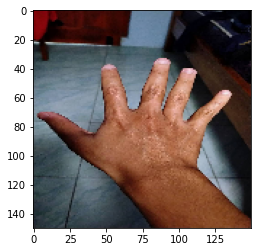

In [ ]:
# menampilkan hasil

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')